In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [17]:
df=pd.read_csv('/home/barbaros/Desktop/Aı/Şarap puanlama/winequality-red.csv')

cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

for i in cols:
    isim=i.split(' ')
    str1=''
    for z in isim:
        str1+=z
    df.rename(columns={i: str1}, inplace=True)
df.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

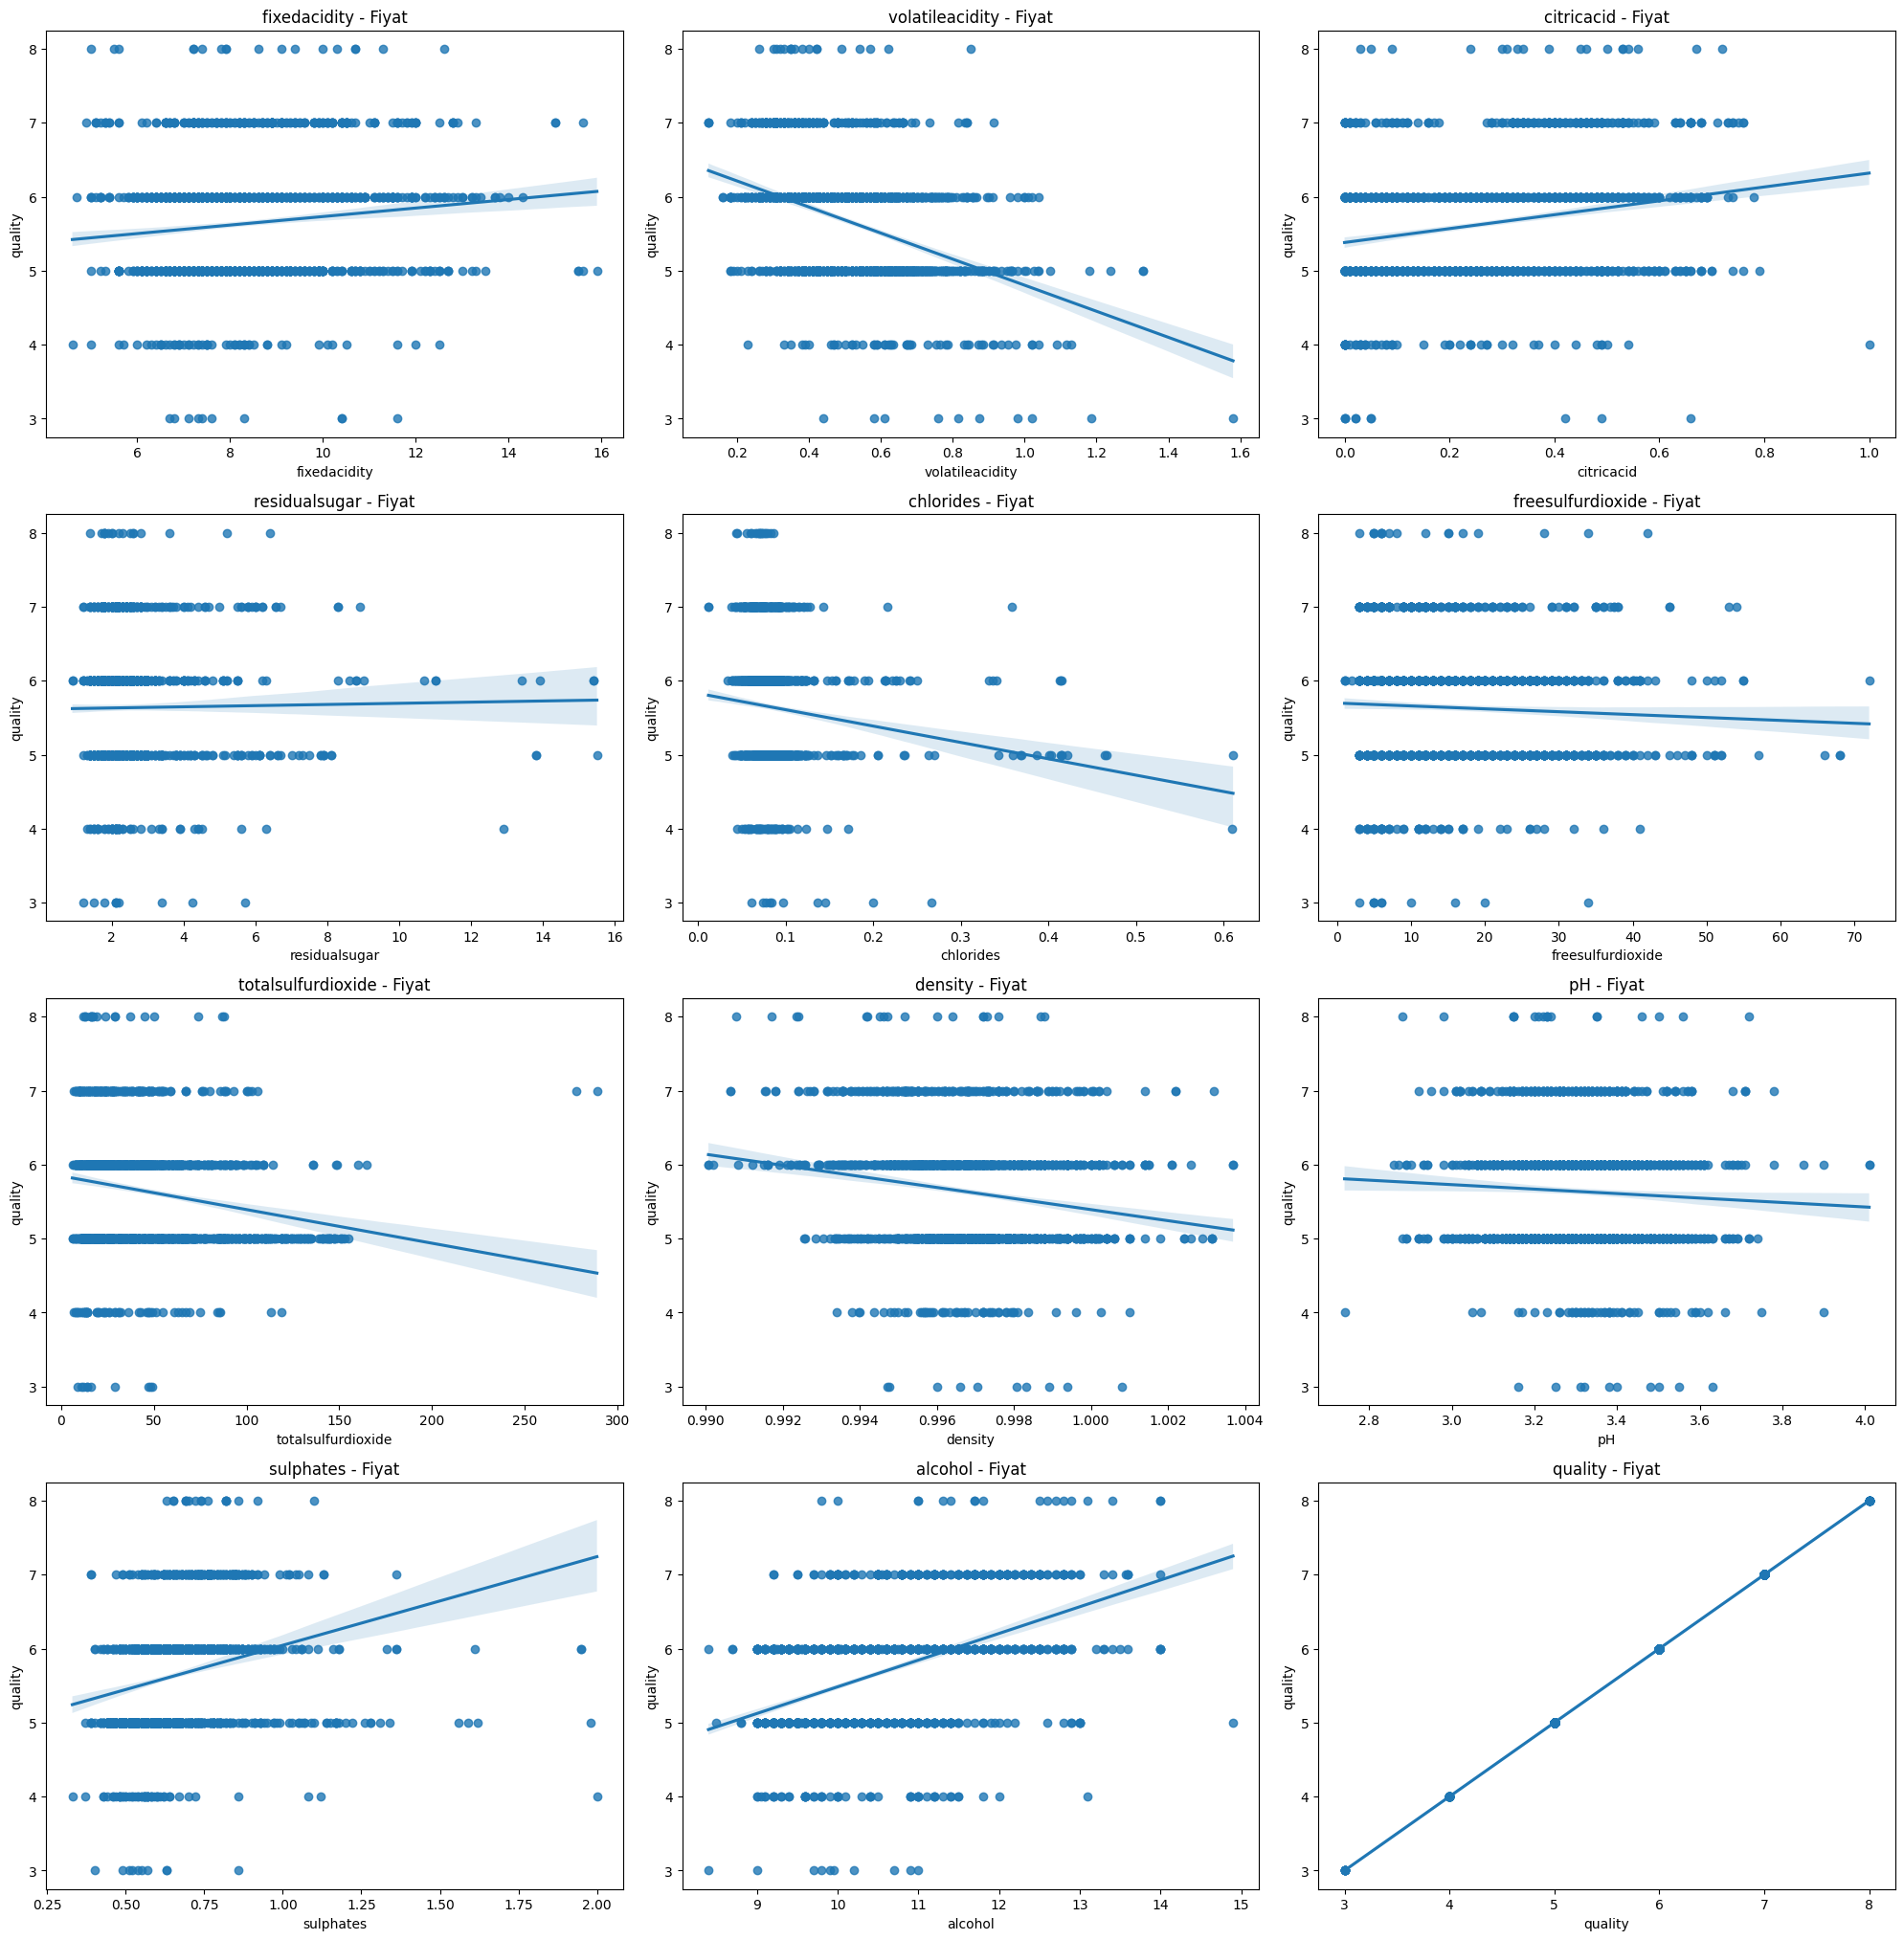

In [18]:
df.columns

cols=['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality']
plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=eval('df' + '.' + cols[i]), y=df.quality)
    
plt.tight_layout()


In [19]:

len(cols)


12

In [20]:
data=df.copy()
data.head()
data.drop(columns=['residualsugar'], axis=1, inplace=True)

train_data, test_data = train_test_split(data, train_size=0.7, random_state=30)

scaler=MinMaxScaler()

scale_col=['fixedacidity', 'volatileacidity', 'citricacid','chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol']

train_data[scale_col]=scaler.fit_transform(train_data[scale_col])

y_train = train_data.pop('quality')
X_train=train_data

train_data.columns


lr=LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [21]:
rfe=RFE(lr, step=8)
rfe = rfe.fit(X_train,y_train)

In [22]:
rfe.support_

array([False,  True, False,  True, False,  True, False, False,  True,
        True])

In [23]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('fixedacidity', False, 2),
 ('volatileacidity', True, 1),
 ('citricacid', False, 2),
 ('chlorides', True, 1),
 ('freesulfurdioxide', False, 2),
 ('totalsulfurdioxide', True, 1),
 ('density', False, 2),
 ('pH', False, 2),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [24]:
X_train_rfe

,volatileacidity,chlorides,totalsulfurdioxide,sulphates,alcohol
417,0.380165,0.131886,0.433824,0.090909,0.363636
729,0.615702,0.098497,0.191176,0.096970,0.763636
741,0.338843,0.110184,0.488971,0.145455,0.181818
1526,0.289256,0.086811,0.117647,0.193939,0.200000
960,0.289256,0.076795,0.117647,0.315152,0.472727
...,...,...,...,...,...
919,0.413223,0.100167,0.147059,0.339394,0.600000
1164,0.549587,0.110184,0.055147,0.206061,0.272727
500,0.330579,0.115192,0.117647,0.193939,0.090909
941,0.123967,0.116861,0.040441,0.115152,0.727273


In [25]:
X_train_rfemodel = X_train_rfe.copy()

def train_ols(X,y):
    X = sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())


In [26]:

train_ols(X_train_rfemodel,y_train)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.91e-99
Time:                        13:17:12   Log-Likelihood:                -1103.9
No. Observations:                1119   AIC:                             2220.
Df Residuals:                    1113   BIC:                             2250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.5069      0